# Graficos Comparativos

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    print("Agrego el src")

/home/apernin/.dev/tda_2023Q1/tp1/src
Agrego el src


In [2]:
import time
import matplotlib.pyplot as plt
from copy import deepcopy
from operator import itemgetter
from main import create_test_dataset, heap_sort, merge_sort, perform_time_test
#from main import heap_sort_2

In [3]:
def test_and_plot(initial_h, initial_k, max_iter, func, multi=2, pre_test=None):
    h = initial_h
    ts_h = []
    k = initial_k
    ts_k = []
    
    ns_k = []
    ns_h = []
    
    ops_k = []
    ops_h = []
    
    n = 0
    
    while n < max_iter:
        # Fijo "n"
        ns_k.append((initial_h, k, initial_h*k))
        # Primero fijo h y pruebo k
        dataset = create_test_dataset(k=k, h=initial_h)
        if pre_test:
            dataset = pre_test(dataset)
        _, t, ops = perform_time_test(func, dataset)
        ts_k.append(t)
        ops_k.append(ops)
        #print(f"En la variona de K tengo h:{initial_h}, k:{k} entonces n: {initial_h*k}")
        
        k *= multi
        
        # Ahora fijo k y pruebo h
        dataset = create_test_dataset(k=initial_k, h=h)
        if pre_test:
            dataset = pre_test(dataset)
        _, t, ops = perform_time_test(func, dataset)
        ts_h.append(t)
        ops_h.append(ops)
        ns_h.append((h, initial_k, h*initial_k))
        #print(f"En la variona de H tengo h:{h}, k:{initial_k} entonces n: {h*initial_k}")
        
        h *= multi
        
        n += 1
    
    plt.plot(list(map(itemgetter(2), ns_k)), ts_k, label='Variacion-k')
    plt.plot(list(map(itemgetter(2), ns_h)), ts_h, label='Variacion-h')
    plt.title(f"Tiempo en funcion variacion k-h de {func.__name__}")
    plt.xlabel("Elementos Totales")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    
    
    plt.plot(list(map(itemgetter(2), ns_k)), ops_k, label='Variacion-k')
    plt.plot(list(map(itemgetter(2), ns_h)), ops_h, label='Variacion-h')
    plt.title(f"Operaciones en funcion variacion k-h de {func.__name__}")
    plt.xlabel("Elementos Totales")
    plt.ylabel("Operaciones Realizadas")
    plt.legend()
    plt.show()
    
    return ns_k, ts_k, ops_k, ns_h, ts_h, ops_h

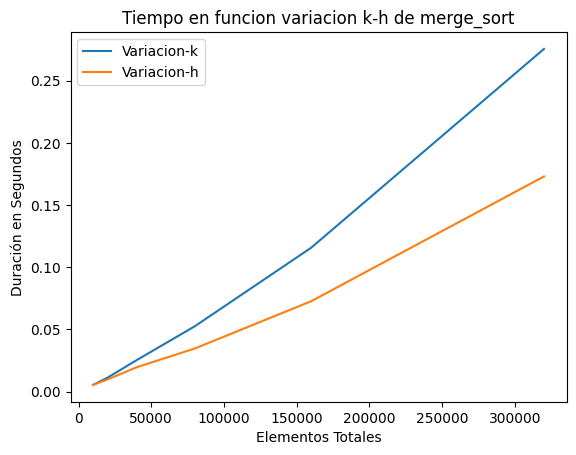

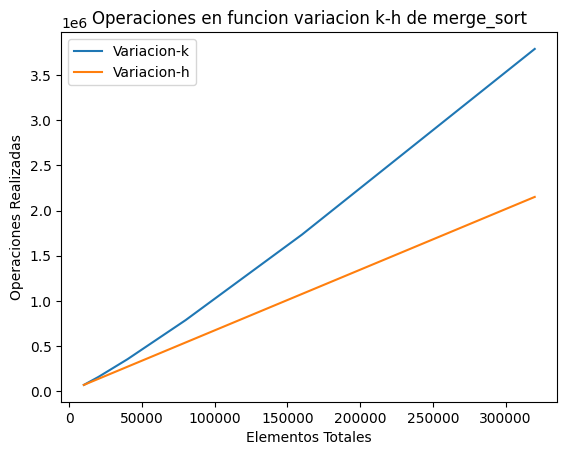

([(100, 100, 10000),
  (100, 200, 20000),
  (100, 400, 40000),
  (100, 800, 80000),
  (100, 1600, 160000),
  (100, 3200, 320000)],
 [0.005460860000000123,
  0.011328891999999868,
  0.025412385000000093,
  0.052637617000000025,
  0.11577087200000014,
  0.2754595499999999],
 [67972, 156144, 352688, 786176, 1733952, 3791104],
 [(100, 100, 10000),
  (200, 100, 20000),
  (400, 100, 40000),
  (800, 100, 80000),
  (1600, 100, 160000),
  (3200, 100, 320000)],
 [0.005527041999999982,
  0.009880652999999961,
  0.019696084000000003,
  0.03477377999999964,
  0.07276404099999967,
  0.17299782499999994],
 [67972, 135172, 269572, 538372, 1075972, 2151172])

In [4]:
test_and_plot(initial_h=100, initial_k=100, max_iter=6, func=merge_sort, multi=2)

## Evaluacion K-Merge Heaps

acorde al análisis hecho del código asumimos que la complejidad del algoritmo es

$O(n) = O(K*H * log(K))$

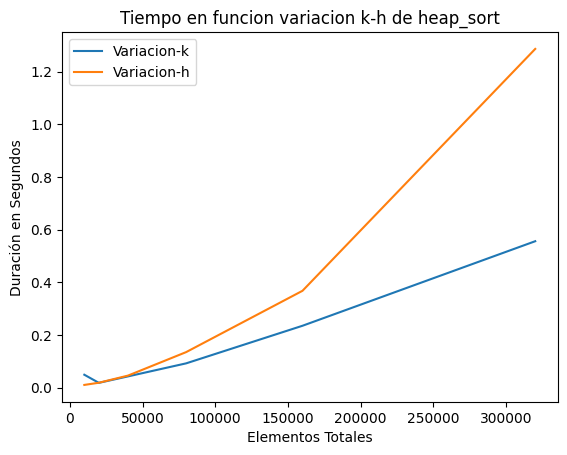

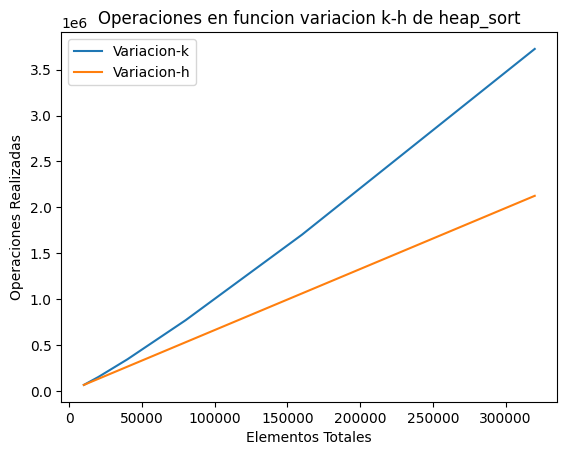

([(100, 100, 10000),
  (100, 200, 20000),
  (100, 400, 40000),
  (100, 800, 80000),
  (100, 1600, 160000),
  (100, 3200, 320000)],
 [0.04936025200000049,
  0.01853203800000003,
  0.0430130550000003,
  0.09254699000000066,
  0.23531432099999972,
  0.5563306629999998],
 [66438.56189774147,
  152877.1237955214,
  345754.2475911145,
  771508.4951830195,
  1703016.9903595836,
  3726033.9807073455],
 [(100, 100, 10000),
  (200, 100, 20000),
  (400, 100, 40000),
  (800, 100, 80000),
  (1600, 100, 160000),
  (3200, 100, 320000)],
 [0.010652545999999319,
  0.01895038299999996,
  0.04602029100000049,
  0.13524742300000003,
  0.3681009729999998,
  1.2865162770000005],
 [66438.56189774147,
  132877.1237955497,
  265754.2475908988,
  531508.4951827296,
  1063016.990366138,
  2126033.9807148348])

In [5]:
test_and_plot(initial_h=100, initial_k=100, max_iter=6, func=heap_sort, multi=2)